# Filtering and business cycles


In [106]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from dateutil.relativedelta import relativedelta
from datetime import timedelta

## 0) Load the Data

*In this exercise you need to replicate some business cycle data work that you studied in class
using any programming language of your choice. You are also encouraged to work with your
classmates in completing these coding exercises. In class, I will ask a few of you to present
your results, so try your best to make your codes and plots are as neat as possible.
Download quarterly data for US real GDP, consumption, and investment.1 Take logs of
the data and make sure that your data is seasonally adjusted.*

As a first step, we imported the datasets we are interested in via the. fredapi library. Specifically, we initialized to a fred object by providing our key as input. Then using the get_series function with the codes of the datasets we were interested in, we downloaded them by saving them in different pandas series. 

In [35]:
from fredapi import Fred
fred = Fred(api_key = '3c333fd92c7d3df79f55af2ee72f13bf')

start_data = '1960-01-01'
end_data = '2023-03-31'

def get_data(code, start_data = start_data, end_data = end_data):
    return fred.get_series(code, start_data, end_data)

gdp = get_data('GDPC1')
cons = get_data('PCECC96')
inv = get_data('GPDIC1')
rec = get_data('USRECQ')

In [36]:
gdp.name = 'gdp'
cons.name = 'cons'
inv.name = 'inv'
rec.name = 'rec'

Log transformation

In [37]:
gdp = np.log(gdp)
cons = np.log(cons)
inv = np.log(inv)

Joined all the series in one dataframe.

In [47]:
cols = [gdp, cons, inv,rec]
df = pd.concat(cols, axis = 1)
df['Date'] = df.index.to_pydatetime()
df.reset_index(drop = True)

,gdp,cons,inv,rec,Date
0,8.094942,7.600308,5.966685,0.0,1960-01-01
1,8.089537,7.612843,5.868848,0.0,1960-04-01
2,8.094419,7.608838,5.866304,1.0,1960-07-01
3,8.081502,7.610132,5.748893,1.0,1960-10-01
4,8.088228,7.609761,5.774514,1.0,1961-01-01
...,...,...,...,...,...
248,9.899685,9.548838,8.266802,0.0,2022-01-01
249,9.898237,9.553891,8.228704,0.0,2022-04-01
250,9.906217,9.559486,8.203537,0.0,2022-07-01
251,9.912571,9.562043,8.214500,0.0,2022-10-01


# 1) US GDP and recession periods

*Plot US real GDP from 1950 Q1 to 2023 Q1. If possible, try to also plot NBER defined recession periods.*

In order to make our plots we make use of an .mplstyle file, that allows to set some default parameters of the graph, and we also defined some function to add some aesthetics together with a title and a description of the plot.

In [39]:
plt.style.use('mystyle.mplstyle')

def make_a_line():
    ax.plot([0.12, .9],              # Set width of line
        [1.05, 1.05],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
    
    
def make_a_rec():
    ax.add_patch(plt.Rectangle((0.12,1.05),            # Set location of rectangle by lower left corder
                           0.04,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
    
    
def make_title(text):
    ax.text(x=0.12, y=0.98, s=text, 
            transform=fig.transFigure, ha='left', 
            fontsize=13, weight='bold', alpha=.8)
    
    
def make_description(text):
    ax.text(x=0.12, y=0.93, s=text, 
            transform=fig.transFigure, ha='left', 
            fontsize=11, alpha=.8)

For the first we just plotted the log real gdp and then we added a grey area in the quarters corresponding to a recession period. In order to add the grey recatangles we use the function axvspan, that does exactly this and that needs as input a start and an end value from the x axis. Given that we have a time series, we first extracted all the recession quarters, providing the first day of the quarter as the beginning value, and the last day of the quarter as the end value.

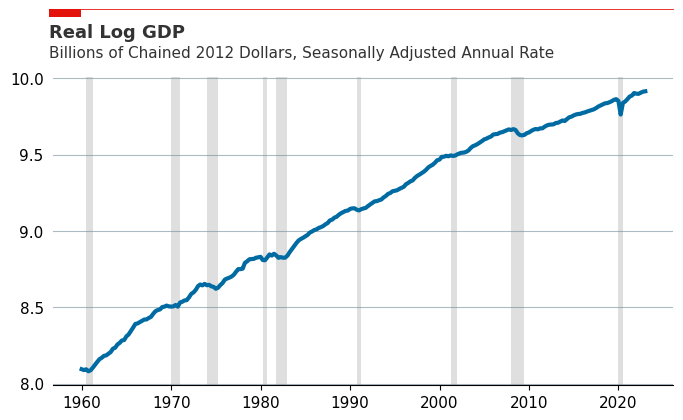

In [52]:
fig, ax = plt.subplots()

ax.plot(df.Date, df.gdp, color='#006BA2', zorder = 2)

ax.yaxis.set_ticks(np.arange(8,10.1,0.5))

make_a_line()
make_a_rec()
make_title('Real Log GDP')
make_description("Billions of Chained 2012 Dollars, Seasonally Adjusted Annual Rate")

recession = df.loc[df["rec"] == 1, 'Date']
for day in recession: 
    ax.axvspan(day, day + relativedelta(months =+ 3), color="grey", alpha = 0.25, lw=0, zorder = 1)


plt.savefig('real log.jpg', bbox_inches='tight', dpi = 300)



# 2) Add the trendline

Basicially we need to convert the datetime series into something numerigal to fit the data

In [59]:
converted_date = df['Date'].values.astype("float64")
x = np.polyfit(converted_date, df.gdp, 1)
z = np.poly1d(x)

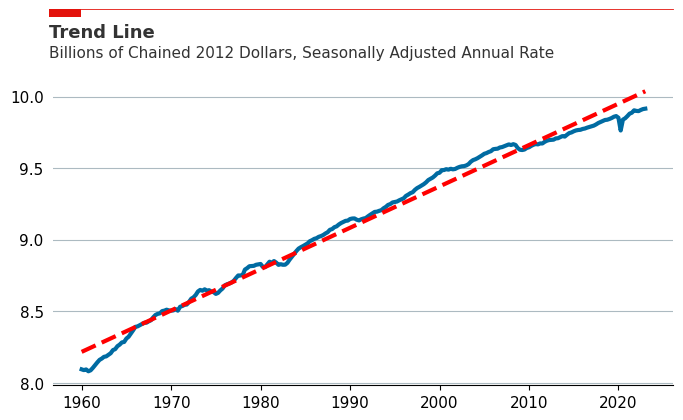

In [64]:
fig, ax = plt.subplots()

ax.plot(df.Date, df.gdp, color='#006BA2', zorder = 2)
ax.plot(df.Date, z(converted_date), "r--")
ax.yaxis.set_ticks(np.arange(8,10.1,0.5))

make_a_line()
make_a_rec()
make_title('Trend Line')
make_description("Billions of Chained 2012 Dollars, Seasonally Adjusted Annual Rate")

Focus after 2000:
maybe we don't have to compute the trend again, but only to take the already computed trend after 200

In [73]:
df_2000 = df.loc[df['Date'] >= '2000-01-01',]
converted_date = df_2000['Date'].values.astype("float64")
x = np.polyfit(converted_date, df_2000.gdp, 1)
z = np.poly1d(x)

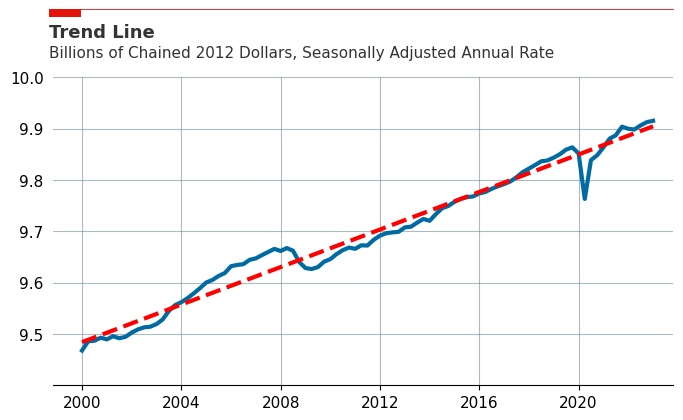

In [123]:
fig, ax = plt.subplots()

ax.plot(df_2000.Date, df_2000.gdp, color='#006BA2', zorder = 2)
ax.plot(df_2000.Date, z(converted_date), "r--")
ax.yaxis.set_ticks(np.arange(9.5,10.1,0.1))
plt.ylim(9.4,10)
plt.xlim(right = max(df_2000.Date)+timedelta(days = 300))
ax.grid(axis =  'x')
make_a_line()
make_a_rec()
make_title('Trend Line')
make_description("Billions of Chained 2012 Dollars, Seasonally Adjusted Annual Rate")